In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
import os
import cv2  
from sklearn.model_selection import train_test_split

Load Data


In [2]:
Data_Train= tf.keras.preprocessing.image_dataset_from_directory('Dataset/Training')
Data_Test= tf.keras.preprocessing.image_dataset_from_directory('Dataset/Testing')
class_names = Data_Train.class_names
X_train, y_train = [], []
for images, labels in Data_Train:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test, y_test = [], []
for images, labels in Data_Test:
    X_test.extend(images.numpy())
    y_test.extend(labels.numpy())

X_test = np.array(X_test)
y_test = np.array(y_test)


Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [3]:
X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5712, 256, 256, 3), (5712,), (1311, 256, 256, 3), (1311,))

In [4]:
class_names[y_train[0]]

'pituitary'

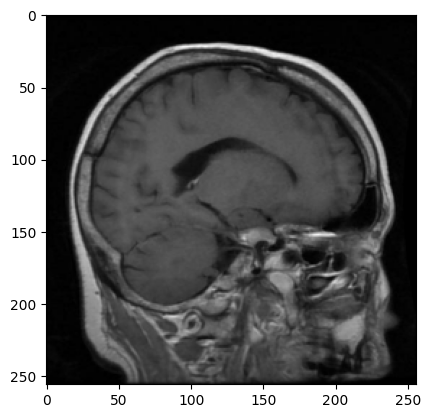

In [5]:
plt.imshow (X_train[0].astype('uint8'))

In [6]:
y_train_label =keras.utils.to_categorical(y_train, num_classes=4)
y_test_label = keras.utils.to_categorical(y_test, num_classes=4)

In [7]:
#split data train 
import numpy as np
X_train = X_train.astype(np.float16)
X_test = X_test.astype(np.float16)
X_train /= 255
X_test /= 255


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_label, test_size=0.2, random_state=42)


In [38]:

input_shape = (256, 256, 3)
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='sigmoid')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,893,092 (30.11 MB)

 Trainable params: 7,893,092 (30.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Create TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)

# Train Model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)


In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_label)
print(f"The test loss is : {test_loss}")
print(f"The test accuracy is : {test_accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - accuracy: 0.8762 - loss: 0.4723
The test loss is : 0.44906139373779297
The test accuracy is : 0.887109100818634


In [ ]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()